In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [14]:
#selected subset of dates. 
val_dates = ['180409','180412','180414']
test_dates = ['180411', '180413']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models'
CH = 23

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256,CH = CH)

In [15]:
ls /home/bijanadmin/Desktop/Goose_data/

data_Goose_1st_15s_1/  data_Goose_1st_5s_2/   figures/
data_Goose_1st_15s_2/  data_Goose_all_15s_2/  loss_accuracy/
data_Goose_1st_2/      data_Goose_all_2/      model/
data_Goose_1st_5s_1/   data_Goose_all_5s_2/


In [16]:
len(train_loader), len(val_loader), len(test_loader)

(173, 26, 24)

In [17]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 1, 100, 10])
torch.Size([256, 1])
256
256
256


date:180327, rec:007, time:5221.0, label:0.0


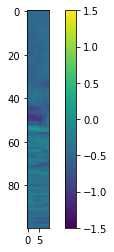

date:180327, rec:007, time:6601.0, label:0.0


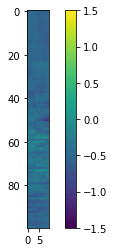

date:180323, rec:005, time:4531.0, label:1.0
date:180330, rec:001, time:3132.0, label:1.0
date:180325, rec:007, time:2263.0, label:1.0
date:180401, rec:001, time:780.0, label:0.0


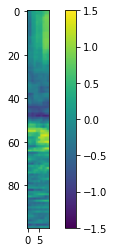

date:180410, rec:006, time:5702.0, label:0.0


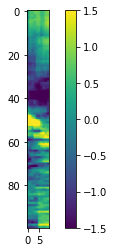

date:180325, rec:001, time:2300.0, label:0.0


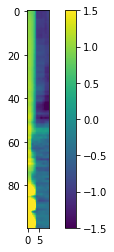

date:180401, rec:001, time:900.0, label:0.0


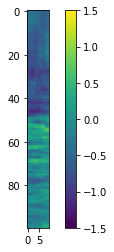

date:180330, rec:001, time:2066.0, label:1.0
date:180325, rec:004, time:120.0, label:1.0
date:180327, rec:007, time:5221.0, label:0.0


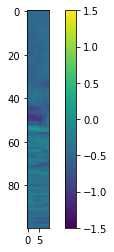

date:180329, rec:001, time:2399.0, label:0.0


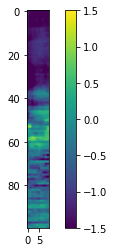

date:180331, rec:007, time:3427.0, label:0.0


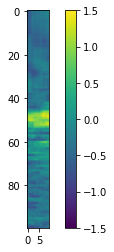

date:180331, rec:007, time:5328.0, label:0.0


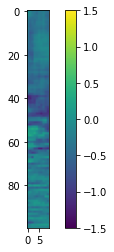

date:180324, rec:008, time:1601.0, label:0.0


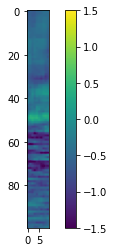

date:180410, rec:003, time:3060.0, label:1.0
date:180322, rec:003, time:2588.0, label:1.0
date:180327, rec:008, time:5273.0, label:0.0


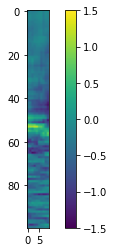

date:180327, rec:007, time:5871.0, label:0.0


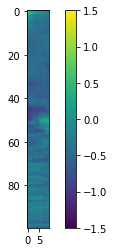

date:180330, rec:004, time:4987.0, label:1.0
date:180330, rec:009, time:4301.0, label:0.0


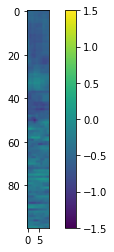

date:180330, rec:008, time:5995.0, label:0.0


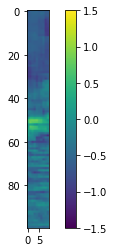

date:180331, rec:007, time:4037.0, label:0.0


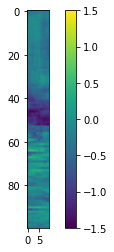

date:180410, rec:003, time:4428.0, label:1.0
date:180327, rec:001, time:6385.0, label:1.0
date:180327, rec:007, time:4050.0, label:0.0


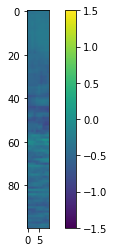

date:180327, rec:004, time:820.0, label:1.0
date:180330, rec:001, time:2982.0, label:1.0
date:180327, rec:008, time:4092.0, label:0.0


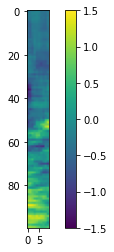

date:180331, rec:007, time:2897.0, label:0.0


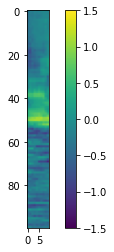

date:180324, rec:008, time:2768.0, label:0.0


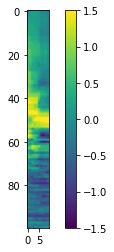

date:180325, rec:009, time:3686.0, label:1.0
date:180327, rec:001, time:510.0, label:0.0


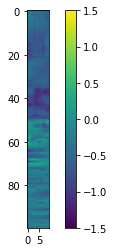

date:180330, rec:003, time:3934.0, label:1.0
date:180325, rec:009, time:90.0, label:0.0


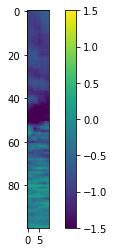

date:180327, rec:005, time:6078.0, label:0.0


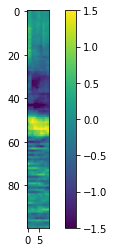

date:180324, rec:008, time:2031.0, label:0.0


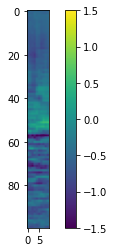

date:180410, rec:004, time:120.0, label:1.0
date:180324, rec:003, time:180.0, label:1.0
date:180325, rec:003, time:1275.0, label:1.0
date:180325, rec:002, time:3477.0, label:1.0
date:180330, rec:008, time:3756.0, label:0.0


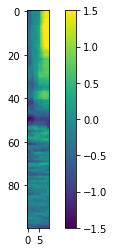

date:180330, rec:008, time:6345.0, label:0.0


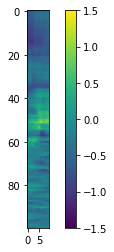

date:180327, rec:001, time:6972.0, label:0.0


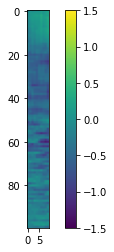

date:180401, rec:001, time:390.0, label:0.0


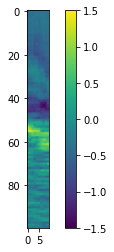

date:180330, rec:009, time:4921.0, label:0.0


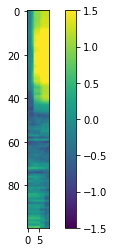

date:180327, rec:007, time:2250.0, label:0.0


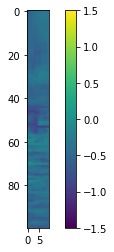

date:180410, rec:004, time:3790.0, label:1.0
date:180327, rec:008, time:500.0, label:0.0


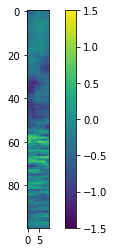

date:180325, rec:007, time:3146.0, label:0.0


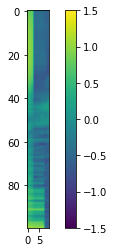

date:180331, rec:005, time:819.0, label:1.0
date:180330, rec:007, time:1262.0, label:1.0
date:180330, rec:009, time:1294.0, label:0.0


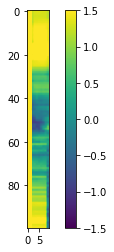

date:180330, rec:003, time:4972.0, label:1.0
date:180331, rec:005, time:7067.0, label:1.0
date:180330, rec:009, time:1634.0, label:0.0


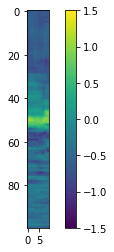

date:180331, rec:007, time:3537.0, label:0.0


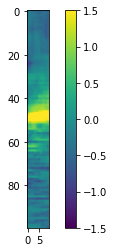

date:180331, rec:007, time:7008.0, label:0.0


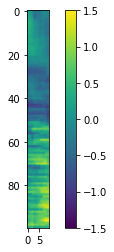

date:180322, rec:004, time:3808.0, label:1.0
date:180330, rec:008, time:6505.0, label:0.0


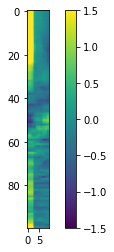

date:180325, rec:009, time:380.0, label:0.0


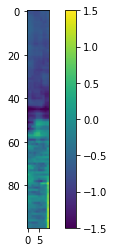

date:180325, rec:002, time:5368.0, label:1.0
date:180324, rec:001, time:838.0, label:0.0


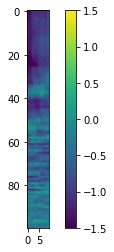

date:180327, rec:007, time:4661.0, label:0.0


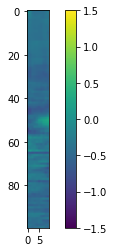

date:180323, rec:004, time:6126.0, label:0.0


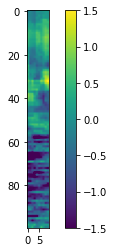

date:180329, rec:002, time:5865.0, label:1.0
date:180401, rec:001, time:1710.0, label:0.0


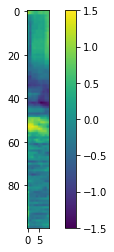

date:180322, rec:007, time:5040.0, label:0.0


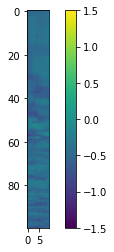

date:180410, rec:004, time:3450.0, label:1.0
date:180330, rec:009, time:3881.0, label:0.0


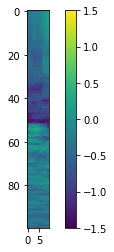

date:180327, rec:001, time:500.0, label:0.0


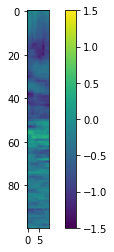

date:180410, rec:005, time:6622.0, label:1.0
date:180329, rec:001, time:6671.0, label:1.0
date:180329, rec:002, time:5055.0, label:1.0
date:180324, rec:008, time:2221.0, label:0.0


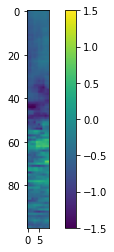

date:180324, rec:008, time:6074.0, label:0.0


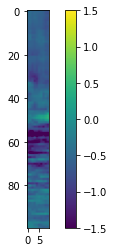

date:180410, rec:006, time:320.0, label:1.0
date:180410, rec:006, time:4629.0, label:1.0
date:180401, rec:001, time:2679.0, label:1.0
date:180325, rec:005, time:2786.0, label:1.0
date:180401, rec:001, time:950.0, label:0.0


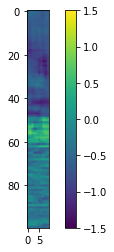

date:180327, rec:008, time:4903.0, label:0.0


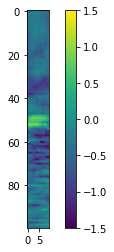

date:180331, rec:005, time:5348.0, label:1.0
date:180330, rec:008, time:4757.0, label:0.0


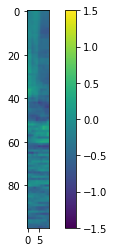

date:180401, rec:001, time:930.0, label:0.0


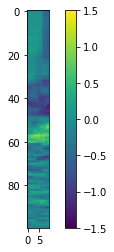

date:180331, rec:007, time:6818.0, label:0.0


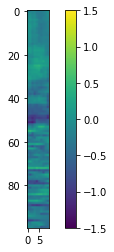

date:180324, rec:008, time:141.0, label:1.0
date:180327, rec:007, time:3550.0, label:0.0


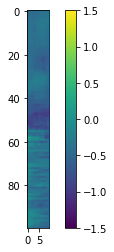

date:180322, rec:005, time:6434.0, label:1.0
date:180330, rec:006, time:150.0, label:1.0
date:180322, rec:007, time:3479.0, label:0.0


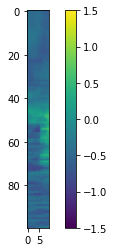

date:180329, rec:004, time:5661.0, label:1.0
date:180329, rec:002, time:3052.0, label:1.0
date:180325, rec:001, time:2340.0, label:0.0


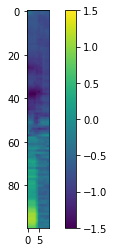

date:180410, rec:003, time:2950.0, label:1.0
date:180325, rec:009, time:4959.0, label:0.0


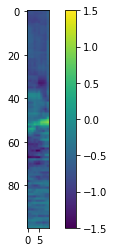

date:180330, rec:001, time:4017.0, label:1.0
date:180410, rec:006, time:5602.0, label:0.0


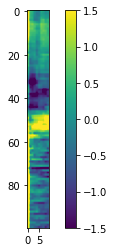

date:180410, rec:002, time:2905.0, label:1.0
date:180410, rec:002, time:150.0, label:1.0
date:180331, rec:001, time:2510.0, label:0.0


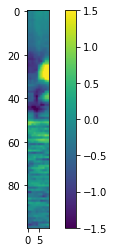

date:180327, rec:005, time:3420.0, label:1.0
date:180327, rec:008, time:1552.0, label:0.0


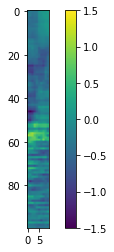

date:180331, rec:005, time:100.0, label:1.0
date:180330, rec:009, time:448.0, label:0.0


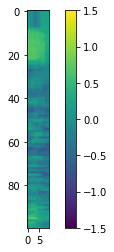

date:180331, rec:004, time:349.0, label:1.0
date:180330, rec:008, time:1251.0, label:0.0


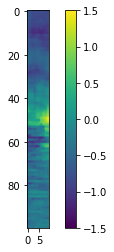

date:180327, rec:004, time:6844.0, label:1.0
date:180330, rec:001, time:6896.0, label:1.0
date:180401, rec:001, time:5307.0, label:0.0


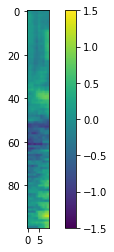

date:180324, rec:004, time:1829.0, label:1.0
date:180327, rec:008, time:3432.0, label:0.0


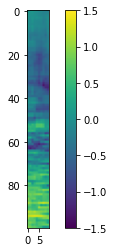

date:180327, rec:007, time:1700.0, label:0.0


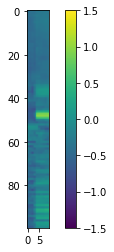

date:180327, rec:008, time:3422.0, label:0.0


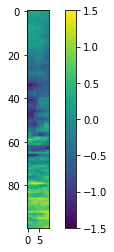

date:180325, rec:009, time:2170.0, label:0.0


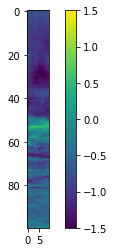

date:180327, rec:004, time:2584.0, label:0.0


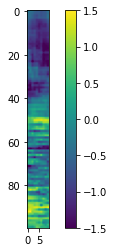

date:180331, rec:005, time:5918.0, label:1.0
date:180325, rec:009, time:1820.0, label:0.0


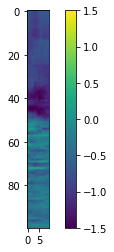

date:180325, rec:006, time:2242.0, label:1.0
date:180410, rec:005, time:1087.0, label:1.0
date:180327, rec:007, time:7101.0, label:0.0


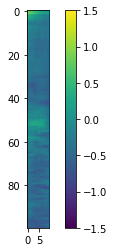

date:180327, rec:007, time:5421.0, label:0.0


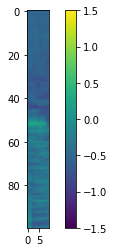

date:180327, rec:008, time:1207.0, label:1.0
date:180327, rec:008, time:1542.0, label:0.0


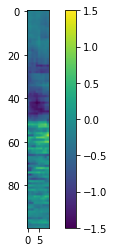

date:180329, rec:003, time:2696.0, label:1.0
date:180324, rec:001, time:100.0, label:0.0


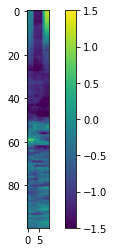

date:180329, rec:006, time:1964.0, label:1.0


In [18]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

### Logistic regression with no regularization

In [11]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
CH = 23
timewindow = 10



Train loss for epoch 0: 0.5468846559524536
Val loss for epoch 0: 0.5694416165351868
Train loss for epoch 1: 0.5269219279289246
Val loss for epoch 1: 0.5262752175331116
1
Train loss for epoch 2: 0.5192998051643372
Val loss for epoch 2: 0.5009810924530029
2
Train loss for epoch 3: 0.5130727887153625
Val loss for epoch 3: 0.5075055956840515
Train loss for epoch 4: 0.5094395279884338
Val loss for epoch 4: 0.5219779014587402
Train loss for epoch 5: 0.5068755149841309
Val loss for epoch 5: 0.4809565246105194
5
Train loss for epoch 6: 0.5034765601158142
Val loss for epoch 6: 0.47100865840911865
6
Train loss for epoch 7: 0.5033138394355774
Val loss for epoch 7: 0.49357399344444275
Train loss for epoch 8: 0.500286877155304
Val loss for epoch 8: 0.4588334560394287
8
Train loss for epoch 9: 0.5021952986717224
Val loss for epoch 9: 0.4669479429721832
Train loss for epoch 10: 0.49864619970321655
Val loss for epoch 10: 0.4620307683944702
Train loss for epoch 11: 0.49840259552001953
Val loss for epoc

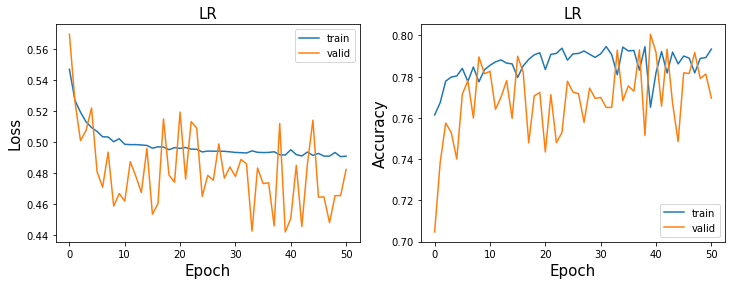

In [12]:

model = GLM(input_dim=100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)

    if train_loss < tol:
        break
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

In [19]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
CH = 23
timewindow = 10



Train loss for epoch 0: 0.548354983329773
Val loss for epoch 0: 0.5577294826507568
Train loss for epoch 1: 0.5281455516815186
Val loss for epoch 1: 0.5271657109260559
1
Train loss for epoch 2: 0.5201467871665955
Val loss for epoch 2: 0.5605992078781128
Train loss for epoch 3: 0.5160122513771057
Val loss for epoch 3: 0.5192429423332214
3
Train loss for epoch 4: 0.5111845135688782
Val loss for epoch 4: 0.4853500425815582
4
Train loss for epoch 5: 0.5089994668960571
Val loss for epoch 5: 0.486930787563324
Train loss for epoch 6: 0.5074425339698792
Val loss for epoch 6: 0.4648496210575104
6
Train loss for epoch 7: 0.5065016746520996
Val loss for epoch 7: 0.4933583736419678
Train loss for epoch 8: 0.505711019039154
Val loss for epoch 8: 0.47469571232795715
Train loss for epoch 9: 0.504289984703064
Val loss for epoch 9: 0.4814551770687103
Train loss for epoch 10: 0.5040846467018127
Val loss for epoch 10: 0.48924651741981506
Train loss for epoch 11: 0.5038732290267944
Val loss for epoch 11: 0

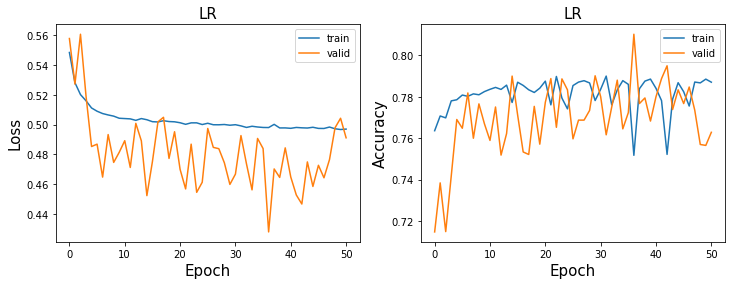

Train loss for epoch 0: 0.5493423938751221
Val loss for epoch 0: 0.5553799867630005
Train loss for epoch 1: 0.527813196182251
Val loss for epoch 1: 0.5512235760688782
1
Train loss for epoch 2: 0.5205750465393066
Val loss for epoch 2: 0.5314682722091675
2
Train loss for epoch 3: 0.515110194683075
Val loss for epoch 3: 0.5137181282043457
3
Train loss for epoch 4: 0.5115415453910828
Val loss for epoch 4: 0.4773821532726288
4
Train loss for epoch 5: 0.5095471143722534
Val loss for epoch 5: 0.5065863728523254
Train loss for epoch 6: 0.5075175762176514
Val loss for epoch 6: 0.4914401173591614
Train loss for epoch 7: 0.506470263004303
Val loss for epoch 7: 0.46305951476097107
7
Train loss for epoch 8: 0.5062522292137146
Val loss for epoch 8: 0.4950691759586334
Train loss for epoch 9: 0.5053839683532715
Val loss for epoch 9: 0.47444218397140503
Train loss for epoch 10: 0.5038866996765137
Val loss for epoch 10: 0.4510425329208374
10
Train loss for epoch 11: 0.5054532289505005
Val loss for epoch

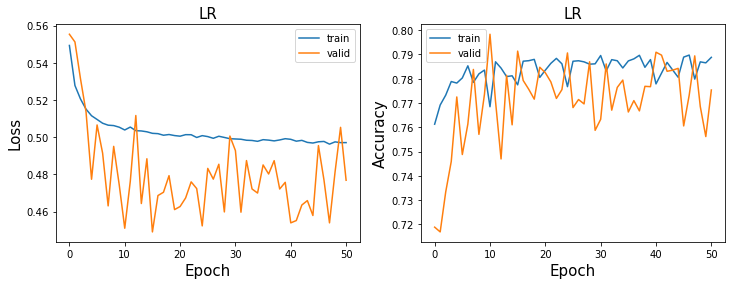

Train loss for epoch 0: 0.5431164503097534
Val loss for epoch 0: 0.578504204750061
Train loss for epoch 1: 0.5257210731506348
Val loss for epoch 1: 0.5259506106376648
1
Train loss for epoch 2: 0.5187446475028992
Val loss for epoch 2: 0.5093507170677185
2
Train loss for epoch 3: 0.5145556330680847
Val loss for epoch 3: 0.5188746452331543
Train loss for epoch 4: 0.5119016170501709
Val loss for epoch 4: 0.48568809032440186
4
Train loss for epoch 5: 0.5082719326019287
Val loss for epoch 5: 0.4874119162559509
Train loss for epoch 6: 0.5075922012329102
Val loss for epoch 6: 0.5011043548583984
Train loss for epoch 7: 0.5063754320144653
Val loss for epoch 7: 0.4867349863052368
Train loss for epoch 8: 0.505408763885498
Val loss for epoch 8: 0.48115274310112
8
Train loss for epoch 9: 0.5049304366111755
Val loss for epoch 9: 0.49645480513572693
Train loss for epoch 10: 0.5057533979415894
Val loss for epoch 10: 0.49245554208755493
Train loss for epoch 11: 0.504461944103241
Val loss for epoch 11: 0

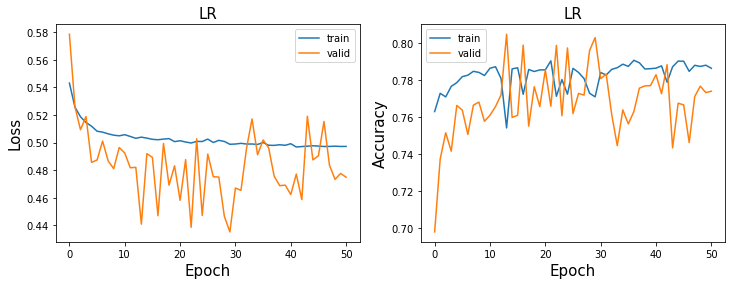

In [24]:
for alpha in alphas:
    model = GLM(input_dim=100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

In [20]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if '_CH23_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)

       epoch
alpha       
1         36
50        15
100       29


/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH23_LOSSbce_REGnone1_EPOCH36_REDUCEsum.pt


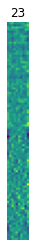

validation loss:0.4281062185764313 accuracy:0.8102719033232628
0.82613295
date:180412, rec:003, time:280.0, label:1.0
Original data 62 CH


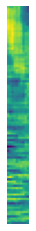

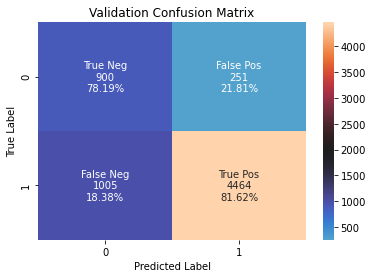

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH23_LOSSbce_REGnone50_EPOCH15_REDUCEsum.pt


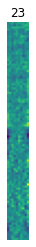

validation loss:0.44905954599380493 accuracy:0.7913897280966767
0.82613295
date:180414, rec:005, time:2563.0, label:1.0
Original data 62 CH


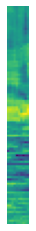

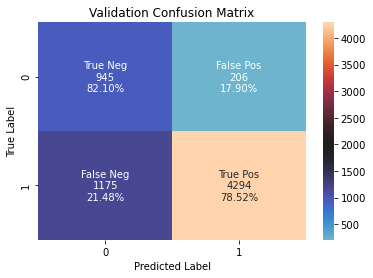

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH23_LOSSbce_REGnone100_EPOCH29_REDUCEsum.pt


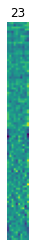

validation loss:0.43532252311706543 accuracy:0.8031722054380664
0.82613295
date:180412, rec:003, time:280.0, label:1.0
Original data 62 CH


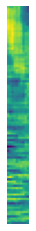

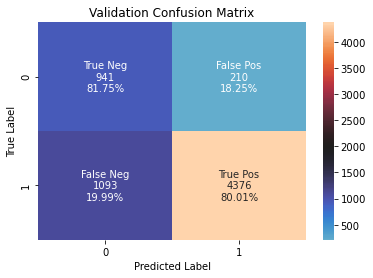

In [26]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
        ## Confusion matrix -Train
    train_loss, train_acc, train_preds, train_preds_probs, train_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('train loss:{} accuracy:{}'.format(train_loss, train_acc))
    print(np.mean(np.concatenate(train_labels)))

    predictions_train = np.concatenate(train_preds)
    labels_train = np.concatenate(train_labels)

    df_train = pd.DataFrame({'predictions': predictions_train, 'labels': labels_train})

    cm_train = confusion_matrix(labels_train, predictions_train)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_train.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_train, annot=labels, fmt='', center = 2000)
    ax.set_title('Train Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix -Validation
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}_REDUCEsum.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### Logistic regression with L2 regularization

In [21]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
CH = 23



Train loss for epoch 0: 0.5477251410484314
Val loss for epoch 0: 0.5432338118553162
Train loss for epoch 1: 0.5295079946517944
Val loss for epoch 1: 0.5279580950737
1
Train loss for epoch 2: 0.5223572254180908
Val loss for epoch 2: 0.5428333282470703
Train loss for epoch 3: 0.5178424715995789
Val loss for epoch 3: 0.4920143187046051
3
Train loss for epoch 4: 0.5148869156837463
Val loss for epoch 4: 0.4836887717247009
4
Train loss for epoch 5: 0.5128746032714844
Val loss for epoch 5: 0.49713626503944397
Train loss for epoch 6: 0.5118077397346497
Val loss for epoch 6: 0.4866812527179718
Train loss for epoch 7: 0.5102573037147522
Val loss for epoch 7: 0.48605892062187195
Train loss for epoch 8: 0.5103985071182251
Val loss for epoch 8: 0.44450807571411133
8
Train loss for epoch 9: 0.5096500515937805
Val loss for epoch 9: 0.47045668959617615
Train loss for epoch 10: 0.5089709758758545
Val loss for epoch 10: 0.46159887313842773
Train loss for epoch 11: 0.5099273920059204
Val loss for epoch 1

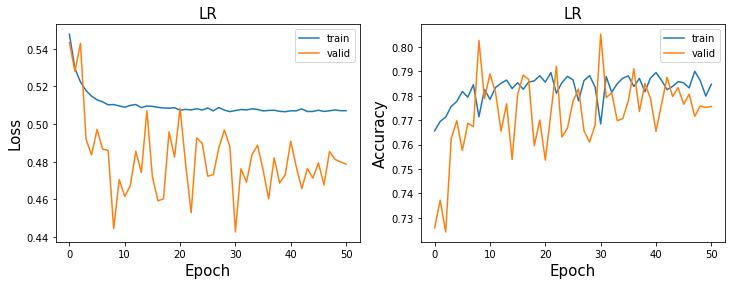

Train loss for epoch 0: 0.618036687374115
Val loss for epoch 0: 0.6042823195457458
Train loss for epoch 1: 0.5875266790390015
Val loss for epoch 1: 0.5773105621337891
1
Train loss for epoch 2: 0.5832206010818481
Val loss for epoch 2: 0.5396818518638611
2
Train loss for epoch 3: 0.5817328095436096
Val loss for epoch 3: 0.5446668863296509
Train loss for epoch 4: 0.5813100934028625
Val loss for epoch 4: 0.5663692951202393
Train loss for epoch 5: 0.5796654224395752
Val loss for epoch 5: 0.5201511979103088
5
Train loss for epoch 6: 0.5796101689338684
Val loss for epoch 6: 0.5123096704483032
6
Train loss for epoch 7: 0.5811998844146729
Val loss for epoch 7: 0.5401515960693359
Train loss for epoch 8: 0.5800619125366211
Val loss for epoch 8: 0.5297945737838745
Train loss for epoch 9: 0.579453706741333
Val loss for epoch 9: 0.5236272811889648
Train loss for epoch 10: 0.5796492099761963
Val loss for epoch 10: 0.5519313216209412
Train loss for epoch 11: 0.5794748663902283
Val loss for epoch 11: 0

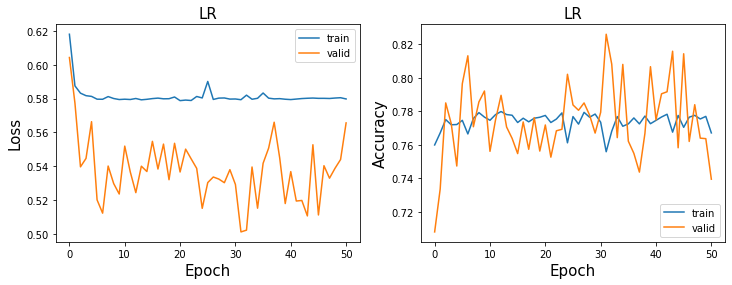

Train loss for epoch 0: 0.655837893486023
Val loss for epoch 0: 0.6212738156318665
Train loss for epoch 1: 0.6195880770683289
Val loss for epoch 1: 0.5920280814170837
1
Train loss for epoch 2: 0.6195243000984192
Val loss for epoch 2: 0.587367057800293
2
Train loss for epoch 3: 0.6190996170043945
Val loss for epoch 3: 0.5917684435844421
Train loss for epoch 4: 0.6162624359130859
Val loss for epoch 4: 0.5768387317657471
4
Train loss for epoch 5: 0.6160517334938049
Val loss for epoch 5: 0.5914903283119202
Train loss for epoch 6: 0.6158088445663452
Val loss for epoch 6: 0.5718870759010315
6
Train loss for epoch 7: 0.6157755851745605
Val loss for epoch 7: 0.5662289261817932
7
Train loss for epoch 8: 0.6177281737327576
Val loss for epoch 8: 0.575072169303894
Train loss for epoch 9: 0.6157675981521606
Val loss for epoch 9: 0.56798255443573
Train loss for epoch 10: 0.6170448660850525
Val loss for epoch 10: 0.5641399025917053
10
Train loss for epoch 11: 0.6161991953849792
Val loss for epoch 11:

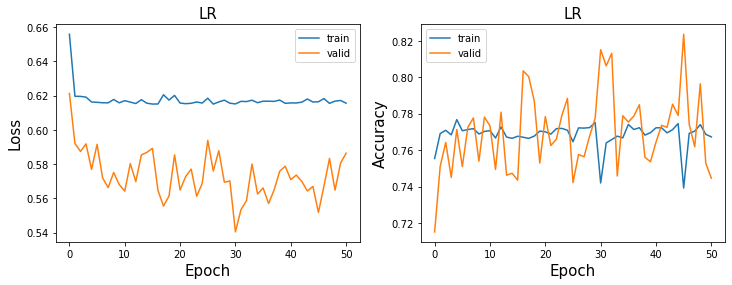

In [28]:
for alpha in alphas:
    model = GLM(100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

In [22]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if '_CH23_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)

       epoch
alpha       
1         30
50        31
100       30


/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH23_LOSSbce_REGl21_EPOCH30_REDUCEsum.pt


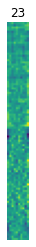

train loss:0.5166913270950317 accuracy:0.7635558583106267
0.5


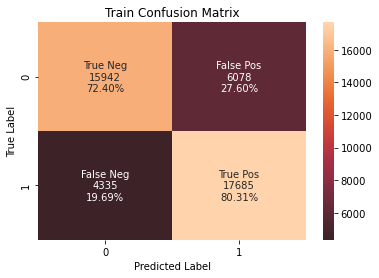

validation loss:0.44275957345962524 accuracy:0.8052870090634441
0.82613295
date:180412, rec:003, time:280.0, label:1.0
Original data 62 CH


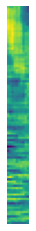

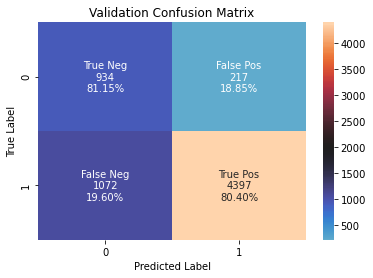

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH23_LOSSbce_REGl250_EPOCH31_REDUCEsum.pt


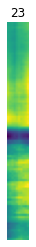

train loss:0.5910201668739319 accuracy:0.7530199818346958
0.5


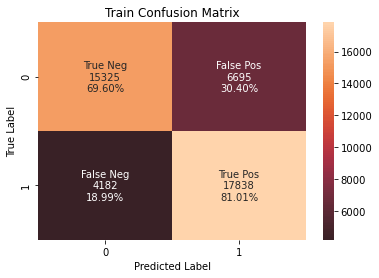

validation loss:0.5012267827987671 accuracy:0.8259818731117825
0.82613295
date:180414, rec:005, time:2563.0, label:1.0
Original data 62 CH


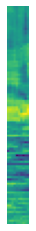

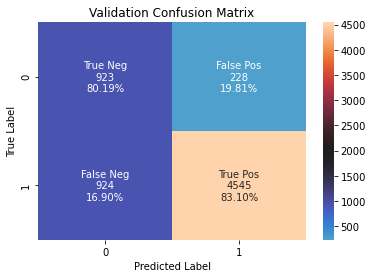

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH23_LOSSbce_REGl2100_EPOCH30_REDUCEsum.pt


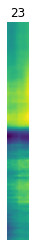

In [ ]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix -Train
    train_loss, train_acc, train_preds, train_preds_probs, train_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('train loss:{} accuracy:{}'.format(train_loss, train_acc))
    print(np.mean(np.concatenate(train_labels)))

    predictions_train = np.concatenate(train_preds)
    labels_train = np.concatenate(train_labels)

    df_train = pd.DataFrame({'predictions': predictions_train, 'labels': labels_train})

    cm_train = confusion_matrix(labels_train, predictions_train)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_train.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_train, annot=labels, fmt='', center = 2000)
    ax.set_title('Train Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix -Validation
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}_REDUCEsum.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### Logistic Regression with finite difference regularization

In [10]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
CH = 23
timewindow = 10



Train loss for epoch 0: 0.5567035675048828
Val loss for epoch 0: 0.5390113592147827
Train loss for epoch 1: 0.5352025032043457
Val loss for epoch 1: 0.5395467877388
Train loss for epoch 2: 0.527693510055542
Val loss for epoch 2: 0.552524983882904
Train loss for epoch 3: 0.523658275604248
Val loss for epoch 3: 0.526179850101471
3
Train loss for epoch 4: 0.5212138295173645
Val loss for epoch 4: 0.4655553102493286
4
Train loss for epoch 5: 0.518218457698822
Val loss for epoch 5: 0.48855575919151306
Train loss for epoch 6: 0.5182281732559204
Val loss for epoch 6: 0.5100546479225159
Train loss for epoch 7: 0.5178633332252502
Val loss for epoch 7: 0.48396074771881104
Train loss for epoch 8: 0.5167897343635559
Val loss for epoch 8: 0.5191559791564941
Train loss for epoch 9: 0.5169031620025635
Val loss for epoch 9: 0.5236301422119141
Train loss for epoch 10: 0.5169582962989807
Val loss for epoch 10: 0.49396413564682007
Train loss for epoch 11: 0.5165009498596191
Val loss for epoch 11: 0.494130

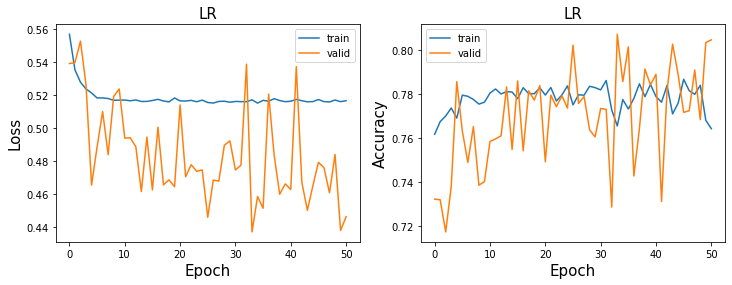

Train loss for epoch 0: 0.6188980340957642
Val loss for epoch 0: 0.5729530453681946
Train loss for epoch 1: 0.5598056316375732
Val loss for epoch 1: 0.5661501288414001
1
Train loss for epoch 2: 0.5563702583312988
Val loss for epoch 2: 0.5115414261817932
2
Train loss for epoch 3: 0.55464106798172
Val loss for epoch 3: 0.524064302444458
Train loss for epoch 4: 0.5532364249229431
Val loss for epoch 4: 0.5041146874427795
4
Train loss for epoch 5: 0.5521222949028015
Val loss for epoch 5: 0.5296813249588013
Train loss for epoch 6: 0.552063524723053
Val loss for epoch 6: 0.5146224498748779
Train loss for epoch 7: 0.551853358745575
Val loss for epoch 7: 0.5051655173301697
Train loss for epoch 8: 0.5529482364654541
Val loss for epoch 8: 0.5228673815727234
Train loss for epoch 9: 0.5524634718894958
Val loss for epoch 9: 0.5245444178581238
Train loss for epoch 10: 0.5511407256126404
Val loss for epoch 10: 0.507761538028717
Train loss for epoch 11: 0.5516251921653748
Val loss for epoch 11: 0.49917

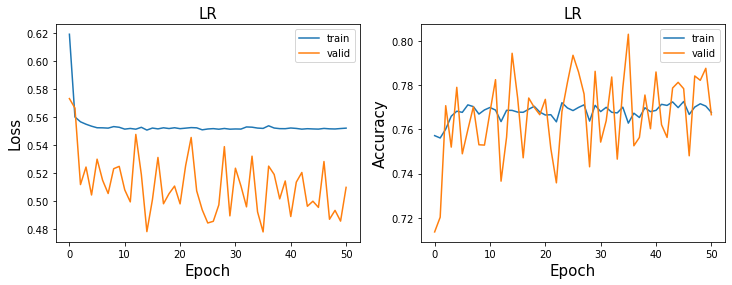

Train loss for epoch 0: 0.6466785073280334
Val loss for epoch 0: 0.5869956016540527
Train loss for epoch 1: 0.5729719996452332
Val loss for epoch 1: 0.5507598519325256
1
Train loss for epoch 2: 0.5699493288993835
Val loss for epoch 2: 0.5355101823806763
2
Train loss for epoch 3: 0.5688698291778564
Val loss for epoch 3: 0.5306406021118164
3
Train loss for epoch 4: 0.5682326555252075
Val loss for epoch 4: 0.5313413143157959
Train loss for epoch 5: 0.5677414536476135
Val loss for epoch 5: 0.5282958745956421
5
Train loss for epoch 6: 0.5677985548973083
Val loss for epoch 6: 0.5270472764968872
6
Train loss for epoch 7: 0.5666795969009399
Val loss for epoch 7: 0.5492552518844604
Train loss for epoch 8: 0.5677016973495483
Val loss for epoch 8: 0.5147156715393066
8
Train loss for epoch 9: 0.5667255520820618
Val loss for epoch 9: 0.5494486093521118
Train loss for epoch 10: 0.568758487701416
Val loss for epoch 10: 0.5425426363945007
Train loss for epoch 11: 0.5674750804901123
Val loss for epoch 

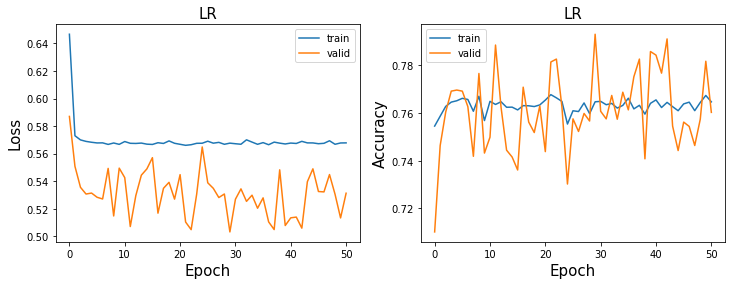

In [11]:
for alpha in alphas:
    model = GLM(100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

In [12]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if '_CH23_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)

       epoch
alpha       
1         33
50        35
100       29


/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff1_EPOCH33_REDUCEsum.pt


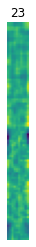

validation loss:0.4372742772102356 accuracy:0.8074018126888217
0.82613295
date:180414, rec:005, time:2563.0, label:1.0
Original data 62 CH


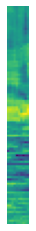

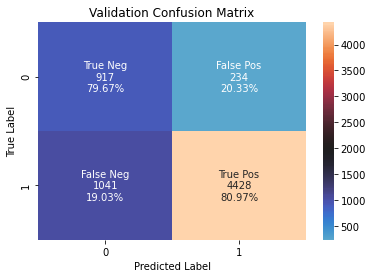

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff50_EPOCH35_REDUCEsum.pt


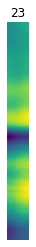

validation loss:0.4777337312698364 accuracy:0.8030211480362538
0.82613295
date:180414, rec:005, time:2563.0, label:1.0
Original data 62 CH


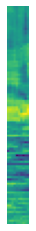

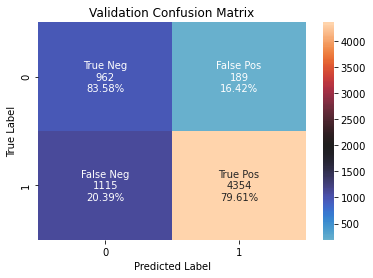

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff100_EPOCH29_REDUCEsum.pt


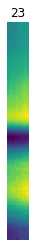

validation loss:0.50312739610672 accuracy:0.7930513595166163
0.82613295
date:180414, rec:005, time:2563.0, label:1.0
Original data 62 CH


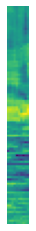

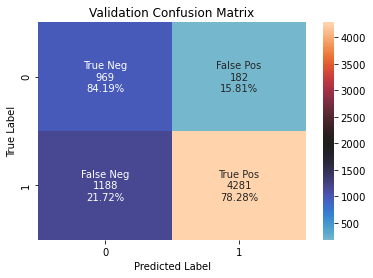

In [13]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix -Train
    train_loss, train_acc, train_preds, train_preds_probs, train_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('train loss:{} accuracy:{}'.format(train_loss, train_acc))
    print(np.mean(np.concatenate(train_labels)))

    predictions_train = np.concatenate(train_preds)
    labels_train = np.concatenate(train_labels)

    df_train = pd.DataFrame({'predictions': predictions_train, 'labels': labels_train})

    cm_train = confusion_matrix(labels_train, predictions_train)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_train.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_train, annot=labels, fmt='', center = 2000)
    ax.set_title('Train Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix -Validation
    
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}_REDUCEsum.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### SVM without regularization

In [22]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6105479598045349
Val loss for epoch 0: 1.2834664583206177
Train loss for epoch 1: 0.5602447986602783
Val loss for epoch 1: 0.9178999662399292
1
Train loss for epoch 2: 0.4674215018749237
Val loss for epoch 2: 3.1678149700164795
Train loss for epoch 3: 0.5240594744682312
Val loss for epoch 3: 0.9516066312789917
Train loss for epoch 4: 0.4172993004322052
Val loss for epoch 4: 1.5819454193115234
Train loss for epoch 5: 0.4704030156135559
Val loss for epoch 5: 1.1257431507110596
Train loss for epoch 6: 0.3469279408454895
Val loss for epoch 6: 1.4243940114974976
Train loss for epoch 7: 0.3866455554962158
Val loss for epoch 7: 1.1779205799102783
Train loss for epoch 8: 0.33019065856933594
Val loss for epoch 8: 1.365188479423523
Train loss for epoch 9: 0.3815663754940033
Val loss for epoch 9: 1.5121104717254639
Train loss for epoch 10: 0.40764206647872925
Val loss for epoch 10: 1.7473173141479492
Train loss for epoch 11: 0.3409585654735565
Val loss for epoch 11: 1.27

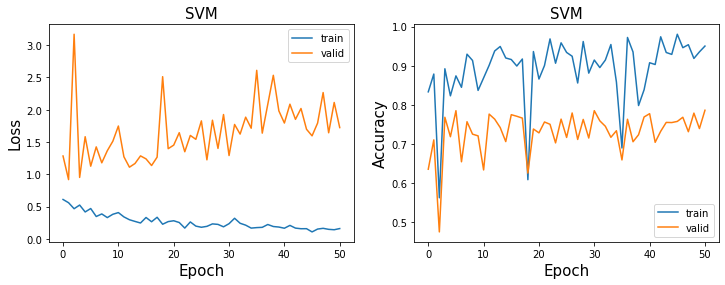

In [14]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [23]:
best_epoch = 1

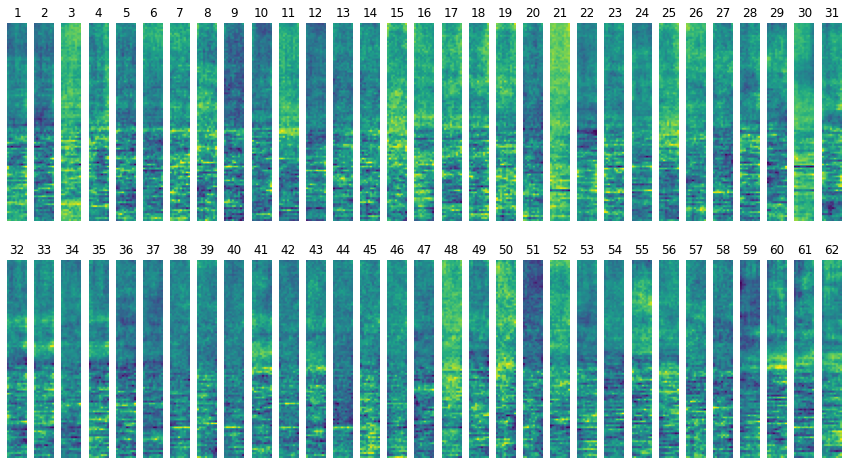

In [24]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [27]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7428555488586426 accuracy:0.7838461538461539


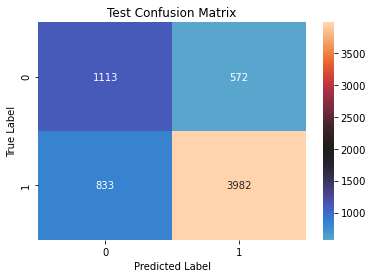

In [28]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


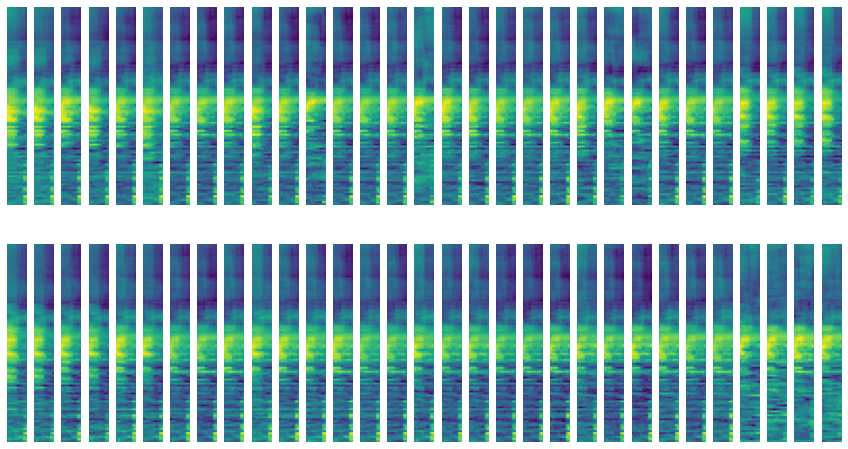

In [30]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_3[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.142331600189209
Val loss for epoch 0: 2.375016927719116
Train loss for epoch 1: 0.8872479200363159
Val loss for epoch 1: 0.9689788222312927
1
Train loss for epoch 2: 0.9464882612228394
Val loss for epoch 2: 1.0704563856124878
Train loss for epoch 3: 0.8319297432899475
Val loss for epoch 3: 1.3819953203201294
Train loss for epoch 4: 0.9815953969955444
Val loss for epoch 4: 2.2135136127471924
Train loss for epoch 5: 0.9559652209281921
Val loss for epoch 5: 1.3571209907531738
Train loss for epoch 6: 0.9480046629905701
Val loss for epoch 6: 0.958657443523407
6
Train loss for epoch 7: 0.8747104406356812
Val loss for epoch 7: 1.0527974367141724
Train loss for epoch 8: 0.938942551612854
Val loss for epoch 8: 1.816292405128479
Train loss for epoch 9: 1.033324956893921
Val loss for epoch 9: 1.2031350135803223
Train loss for epoch 10: 0.908989667892456
Val loss for epoch 10: 0.6989802718162537
10
Train loss for epoch 11: 0.9314482808113098
Val loss for epoch 11: 1.08010

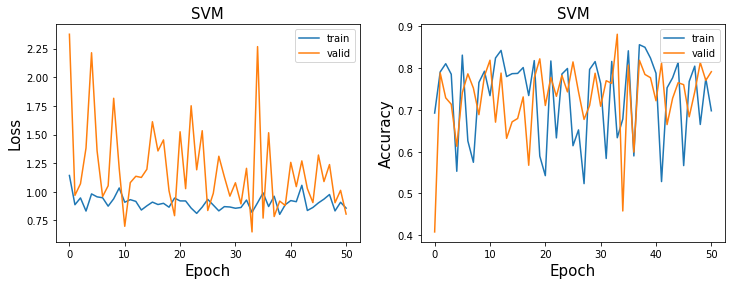

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [32]:
best_epoch = 33

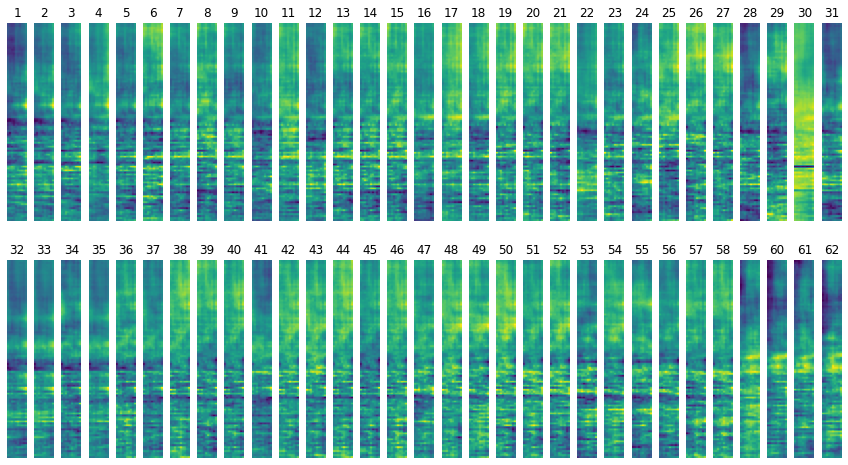

In [33]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.2684636116027832 accuracy:0.7512307692307693


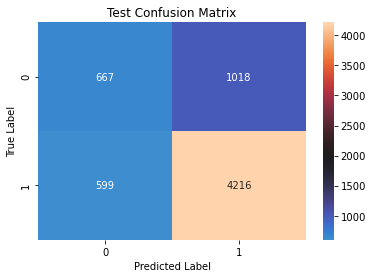

In [35]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


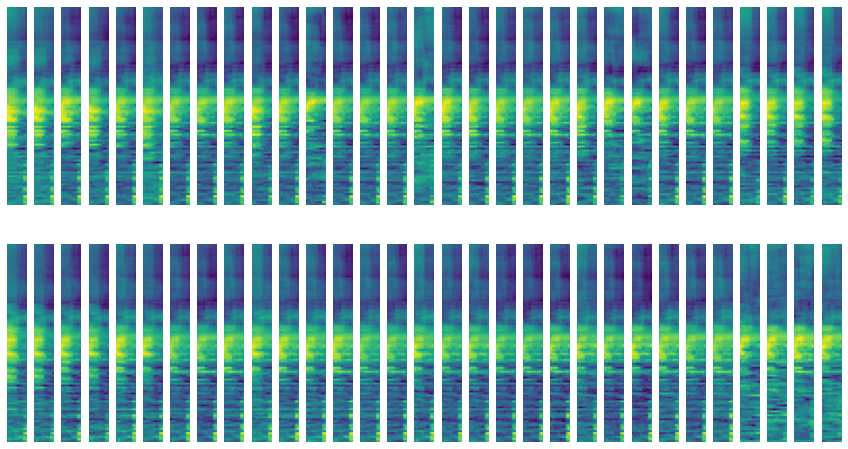

In [36]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_4[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [37]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.1333791017532349
Val loss for epoch 0: 1.699452519416809
Train loss for epoch 1: 0.7799455523490906
Val loss for epoch 1: 1.1568527221679688
1
Train loss for epoch 2: 0.8088831305503845
Val loss for epoch 2: 1.5023279190063477
Train loss for epoch 3: 0.7681555151939392
Val loss for epoch 3: 1.125550389289856
3
Train loss for epoch 4: 0.779151201248169
Val loss for epoch 4: 0.9314382076263428
4
Train loss for epoch 5: 0.6864786744117737
Val loss for epoch 5: 1.0832509994506836
Train loss for epoch 6: 0.6971858739852905
Val loss for epoch 6: 1.0215011835098267
Train loss for epoch 7: 0.7639809250831604
Val loss for epoch 7: 1.7163935899734497
Train loss for epoch 8: 0.7523619532585144
Val loss for epoch 8: 1.3559271097183228
Train loss for epoch 9: 0.837641179561615
Val loss for epoch 9: 1.0237863063812256
Train loss for epoch 10: 0.7160231471061707
Val loss for epoch 10: 1.128845453262329
Train loss for epoch 11: 0.7040753364562988
Val loss for epoch 11: 3.2867

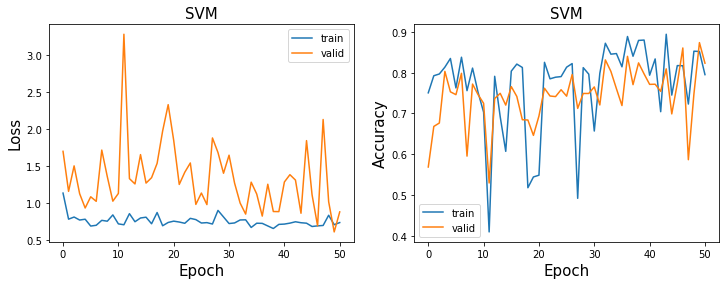

In [20]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [38]:
best_epoch = 49

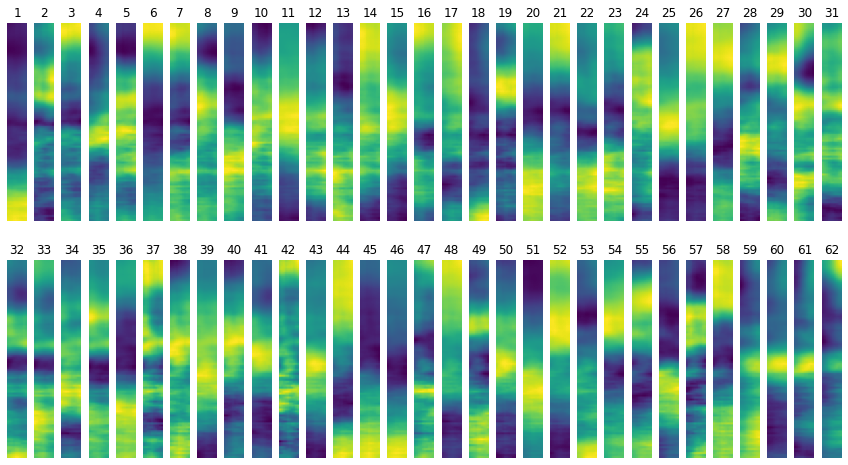

In [39]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [40]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8956817984580994 accuracy:0.8355384615384616


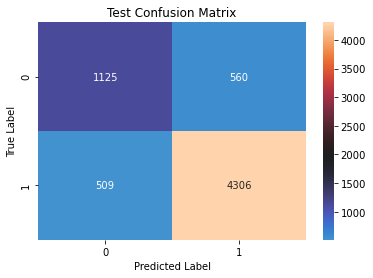

In [41]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


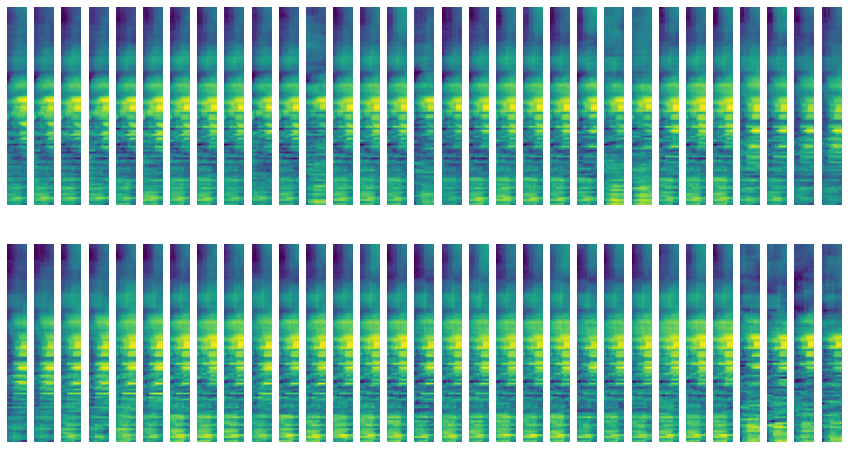

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_5[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()